In [ ]:
pip install pandas numpy matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
survey = pd.read_csv("CP1 Stack Overflow Database.csv")
print(survey)

In [ ]:
numeric_columns = survey.select_dtypes(include=['int', 'float','int64','float64']).columns
num_numeric_columns = len(numeric_columns)
print(f"{num_numeric_columns} são colunas numericas no DF survey")
mem_usage_mb = survey.memory_usage(deep=True).sum() / (1024 * 1024)
print(f"{mem_usage_mb} MBs no DF survey")

In [ ]:
survey_new = survey[['MainBranch', 'Age', 'Employment', 'RemoteWork', 'EdLevel',
                 'DevType', 'OrgSize', 'Country', 'ConvertedCompYearly',
                 'WorkExp', 'Industry']]
print(survey_new)

In [ ]:
numeric_columns = survey_new.select_dtypes(include=['int', 'float','int64','float64']).columns
print(f"{num_numeric_columns} são colunas numericas no DF survey_new")
mem_usage_mb = survey_new.memory_usage(deep=True).sum() / (1024 * 1024)
print(f"{mem_usage_mb} MBs no DF survey_new")

In [ ]:
# Calculando a média
media = survey_new['ConvertedCompYearly'].mean()

# Calculando a mediana
mediana = survey_new['ConvertedCompYearly'].median()

# Calculando o desvio padrão
desvio_padrao = survey_new['ConvertedCompYearly'].std()

# Calculando o valor máximo
maximo = survey_new['ConvertedCompYearly'].max()

# Calculando o valor mínimo
minimo = survey_new['ConvertedCompYearly'].min()

# Exibindo os resultados
print("Média:", media)
print("Mediana:", mediana)
print("Desvio Padrão:", desvio_padrao)
print("Valor Máximo:", maximo)
print("Valor Mínimo:", minimo)

In [ ]:
q1 = survey_new['ConvertedCompYearly'].quantile(0.25)

# Calculando o terceiro quartil (Q3)
q3 = survey_new['ConvertedCompYearly'].quantile(0.75)

# Calculando o IQR
iqr = q3 - q1

# Calculando os limites para identificar outliers
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Exibindo os limites
print("Limite Inferior:", limite_inferior)
print("Limite Superior:", limite_superior)

In [ ]:
outliers = survey_new[(survey_new['ConvertedCompYearly'] > limite_superior) | (survey_new['ConvertedCompYearly'] < limite_inferior)]

# Contando o número de observações que são outliers
numero_de_outliers = outliers.shape[0]

print("Número de observações que são outliers:", numero_de_outliers)

In [ ]:
contagem_formato_hibrido = (survey_new['RemoteWork'] == 'Hybrid (some remote, some in-person)').sum()
contagem_formato_remoto = (survey_new['RemoteWork'] == 'Remote').sum()
contagem_formato_presencial = (survey_new['RemoteWork'].isna()).sum()

# Calculando o total de respondentes
total_respondentes = survey_new['RemoteWork'].count()

# Calculando a porcentagem de cada categoria
porcentagem_formato_hibrido = (contagem_formato_hibrido / total_respondentes) * 100
porcentagem_formato_remoto = (contagem_formato_remoto / total_respondentes) * 100
porcentagem_formato_presencial = (contagem_formato_presencial / total_respondentes) * 100

print("Porcentagem de respondentes que trabalham no formato híbrido:", porcentagem_formato_hibrido, "%")
print("Porcentagem de respondentes que trabalham no formato remoto:", porcentagem_formato_remoto, "%")
print("Porcentagem de respondentes que trabalham no formato presencial:", porcentagem_formato_presencial, "%")

In [ ]:
# Agrupando os respondentes pela coluna 'RemoteWork'
grupos_remote_work = survey_new.groupby('RemoteWork')

# Calculando a média e mediana da remuneração 'ConvertedCompYearly' para cada grupo
media_remuneracao = grupos_remote_work['ConvertedCompYearly'].mean()
mediana_remuneracao = grupos_remote_work['ConvertedCompYearly'].median()

# Exibindo os resultados
print("Média da remuneração anual por formato de trabalho:")
print(media_remuneracao)
print("\nMediana da remuneração anual por formato de trabalho:")
print(mediana_remuneracao)

In [ ]:
num_setores_unicos = survey_new['Industry'].nunique()

print("Número de setores únicos na coluna 'Industry':", num_setores_unicos)

In [ ]:
# Filtrando o dataframe original para incluir apenas os países desejados
countries = ['United States of America', 'United Kingdom of Great Britain and Northern Ireland', 'Canada']
survey_country = survey[survey['Country'].isin(countries)]
print(survey_country)

# Calculando a média e o desvio padrão da variável 'ConvertedCompYearly' para cada país
country_stats = survey_country.groupby('Country')['ConvertedCompYearly'].agg(['mean', 'std'])

# Imprimindo as estatísticas para todos os países
print("Estatísticas salariais por país:")
print(country_stats)

# Obtendo o número de observações no dataframe para cada país
num_observations_per_country = survey_country['Country'].value_counts()

# Imprimindo o número de observações para cada país
print("\nNúmero de observações por país:")
print(num_observations_per_country)

# Encontrando o país com a maior média de salários
max_mean_country = country_stats['mean'].idxmax()
max_mean_salary = country_stats.loc[max_mean_country, 'mean']

# Encontrando o país com o maior desvio padrão entre os salários
max_std_country = country_stats['std'].idxmax()
max_std_salary = country_stats.loc[max_std_country, 'std']

# Imprimindo os resultados
print("\nPaís com a maior média de salários:", max_mean_country)
print("Média de salários neste país:", max_mean_salary)
print("País com o maior desvio padrão entre os salários:", max_std_country)
print("Desvio padrão de salários neste país:", max_std_salary)

In [ ]:
# Calcular a porcentagem de cada formato de trabalho
porcentagem_hibrido = (survey_country['RemoteWork'] == 'Hybrid').mean() * 100
porcentagem_remoto = (survey_country['RemoteWork'] == 'Remote').mean() * 100
porcentagem_presencial = (survey_country['RemoteWork'] == 'Onsite').mean() * 100

print("Porcentagem de trabalhadores no formato híbrido:", porcentagem_hibrido)
print("Porcentagem de trabalhadores no formato remoto:", porcentagem_remoto)
print("Porcentagem de trabalhadores no formato presencial:", porcentagem_presencial)

# Calcular a porcentagem de trabalhadores remotos no dataframe principal
porcentagem_remoto_survey_new = (survey_new['RemoteWork'] == 'Remote').mean() * 100

# Calcular a porcentagem de trabalhadores remotos no dataframe 'survey_country'
porcentagem_remoto_survey_country = (survey_country['RemoteWork'] == 'Remote').mean() * 100

# Comparar as porcentagens
if porcentagem_remoto_survey_new > porcentagem_remoto_survey_country:
    print("Há mais trabalhadores remotos no dataframe principal 'survey_new'.")
elif porcentagem_remoto_survey_new < porcentagem_remoto_survey_country:
    print("Há mais trabalhadores remotos nos países selecionados no novo dataframe 'survey_country'.")
else:
    print("A porcentagem de trabalhadores remotos é a mesma nos dois dataframes.")

In [ ]:
# Filtro para manter apenas as observações nas indústrias especificadas
industries_of_interest = ['Information Services, IT, Software Development, or other Technology',
                          'Financial Services',
                          'Insurance']
survey_country_ind = survey_country[survey_country['Industry'].isin(industries_of_interest)]
print(survey_country_ind)

# Calcular o salário médio por país e por indústria
salario_medio_por_pais_industria = survey_country_ind.groupby(['Country', 'Industry'])['ConvertedCompYearly'].mean()

# Encontrar o país e a indústria com a maior média salarial
maior_salario_medio = salario_medio_por_pais_industria.idxmax()
maior_salario_medio_valor = salario_medio_por_pais_industria.max()

# Encontrar o país e a indústria com a menor média salarial
menor_salario_medio = salario_medio_por_pais_industria.idxmin()
menor_salario_medio_valor = salario_medio_por_pais_industria.min()

# Imprimir os resultados
print("Na indústria de", maior_salario_medio[1], "do país", maior_salario_medio[0], "está a maior média salarial:", maior_salario_medio_valor)
print("Na indústria de", menor_salario_medio[1], "do país", menor_salario_medio[0], "está a menor média salarial:", menor_salario_medio_valor)

In [ ]:
# Calcular a média de anos de experiência por indústria
media_experiencia_por_industria = survey_country_ind.groupby('Industry')['WorkExp'].mean()

# Encontrar a indústria com mais experiência
industria_mais_experiencia = media_experiencia_por_industria.idxmax()
maior_experiencia = media_experiencia_por_industria.max()

# Encontrar a indústria com menos experiência
industria_menos_experiencia = media_experiencia_por_industria.idxmin()
menor_experiencia = media_experiencia_por_industria.min()

# Imprimir os resultados
print("Média de anos de experiência para cada indústria:")
print(media_experiencia_por_industria)
print("\nNa indústria de", industria_mais_experiencia, "estão os desenvolvedores com mais experiência, com uma média de", maior_experiencia, "anos.")
print("Na indústria de", industria_menos_experiencia, "estão os desenvolvedores com menos experiência, com uma média de", menor_experiencia, "anos.")

In [ ]:

sns.set_style('whitegrid')

# Criar o histograma
plt.figure(figsize=(10, 6))
sns.histplot(data=survey_country_ind, x='WorkExp', bins=20, kde=True)
plt.title('Histograma de Experiência de Trabalho')
plt.xlabel('Anos de Experiência')
plt.ylabel('Contagem')
plt.show()

In [ ]:
# Mapeamento de cores para as categorias de 'Industry'
cores = {'Information Services, IT, Software Development, or other Technology': 'blue',
         'Financial Services': 'green',
         'Insurance': 'red'}

# Criar o gráfico de dispersão
plt.figure(figsize=(12, 8))

# Iterar sobre as categorias de 'Industry' e plotar cada uma separadamente
for industry, color in cores.items():
    data = survey_country_ind[survey_country_ind['Industry'] == industry]
    plt.scatter(x=data['Country'], y=data['ConvertedCompYearly'], c=color, label=industry)

# Adicionar rótulo aos eixos
plt.xlabel('Country')
plt.ylabel('ConvertedCompYearly')

# Rotacionar os nomes no eixo x em 90 graus
plt.xticks(rotation=90)

# Limitar os valores do eixo y
plt.ylim(-10000, 1500000)

# Adicionar legenda
plt.legend(title='Industry')

# Adicionar título ao gráfico
plt.title('Gráfico de Dispersão: ConvertedCompYearly vs Country')

# Exibir o gráfico
plt.show()

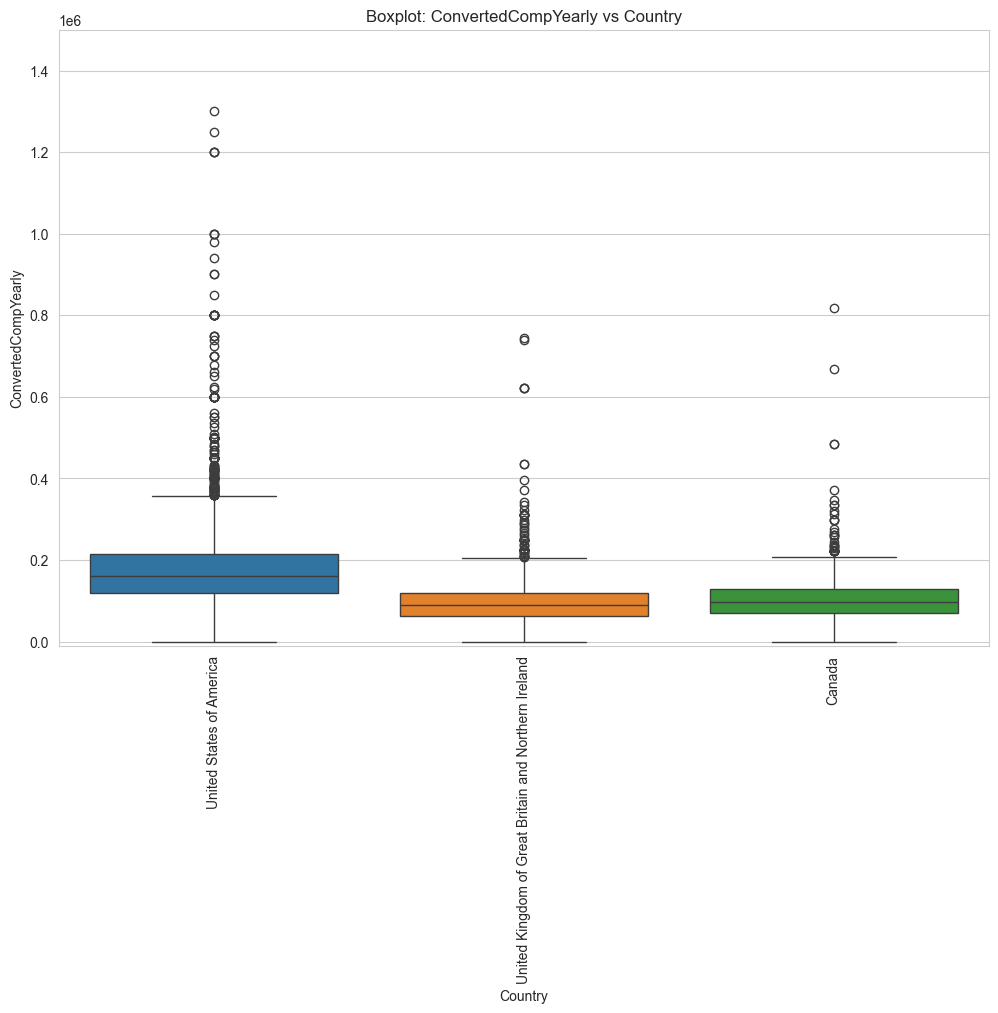

In [27]:
# Definir o estilo do gráfico
sns.set_style('whitegrid')

# Criar o boxplot
plt.figure(figsize=(12, 8))

# Criar o boxplot usando seaborn com a paleta 'viridis' e definir hue='Country'
sns.boxplot(data=survey_country_ind, x='Country', y='ConvertedCompYearly', hue='Country', legend=False)

# Rotacionar os nomes no eixo x em 90 graus
plt.xticks(rotation=90)

# Limitar os valores do eixo y
plt.ylim(-10000, 1500000)

# Adicionar rótulo aos eixos
plt.xlabel('Country')
plt.ylabel('ConvertedCompYearly')

# Adicionar título ao gráfico
plt.title('Boxplot: ConvertedCompYearly vs Country')

# Exibir o gráfico
plt.show()

In [ ]:
# Definir o estilo do gráfico
sns.set_style('whitegrid')

# Criar o countplot
plt.figure(figsize=(12, 6))
countplot = sns.countplot(data=survey_country_ind, x='OrgSize', hue='OrgSize', palette='viridis', legend=False)

# Rotacionar os rótulos do eixo x em 90 graus
plt.xticks(rotation=90)

# Adicionar rótulo aos eixos
plt.xlabel('OrgSize')
plt.ylabel('Contagem')

# Adicionar título ao gráfico
plt.title('Contagem de OrgSize')

# Exibir o gráfico
plt.show()

orgsize_counts = survey_country_ind['OrgSize'].value_counts()
tamanho_preditominante = orgsize_counts.idxmax()
print("O tamanho das empresas predominante é:", tamanho_preditominante)

In [ ]:
sns.set_style('whitegrid')

# Criar o violinplot
plt.figure(figsize=(12, 8))
violinplot = sns.violinplot(data=survey_country_ind, x='RemoteWork', y='WorkExp', hue='RemoteWork', palette='viridis', split=True)

# Rotacionar os nomes no eixo x em 90 graus
plt.xticks(rotation=90)

# Adicionar rótulo aos eixos
plt.xlabel('RemoteWork')
plt.ylabel('WorkExp')

# Adicionar título ao gráfico
plt.title('Violinplot: WorkExp vs RemoteWork')

# Exibir o gráfico
plt.show()